In [1]:
import torch

In [7]:
import scipy.io as sio
import PySimpleGUI as sg

In [2]:
import scipy.io as sio
from scipy.interpolate import interp1d
import scipy
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import PySimpleGUI as sg
import matplotlib.cm as cm
import seaborn as sns


# Retrieve pickle and csv data

In [1]:
## pickle ##
import pickle

file = open('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/robin_data_tensor_dump.pkl', 'rb')
filtered_data_to_tensor = pickle.load(file)
amplitude_filtereddata_to_tensor  = pickle.load(file)
peak2peak_data_to_tensor = pickle.load(file)

file.close()



In [4]:
# to retrieve ##
mt_electrodes = pd.read_csv('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_electrodes.csv')
mt_muscles= pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_muscles.csv")
unique_amplitudes=pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/unique_amplitudes.csv")

# USE GUI

In [3]:



sg.Window(title= "Hello World", layout=[[]], margins=(100, 50)).read()

NameError: name 'sg' is not defined

In [9]:
layout=[
    [sg.Text("Hello form PySimpleGUI")],
    [sg.Button("1")], [sg.Button("2")], [sg.Button("3")], 

    ]




sg.Window(title= "Hello World", layout=layout, margins=(100, 50)).read()

# create the window
# window= sg.Window("Demo", layout )

# # Create an event loop
# while True:
#     event, values= window.read()
#     # End program if user closes window or presses OK button
#     if event == "OK" or event == sg.WIN_CLOSED:
        
#         window.close()   
#         break

# # window.close()    

('1', {})

: 

IM

# For muscle i get info

## GUI 

- Heat map
- top 3 muscles activated by chosen elec
- muscle recruitment curve

### Get top three muslces for the elec

In [5]:
M=len(mt_muscles["muscle_name"])
N=len(mt_electrodes["elec_name"])

data=np.zeros((M,N))
for muscle_i in range(0, len(mt_muscles)):
    for elec_i in range (0, len(mt_electrodes)):
        ## Find max value for one combination
        max_value=np.nanmax(peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])
        ## Divide max value by amplitude at max value to normalise (not just between muscles but also between elecs)
        max_value_amplitude=amplitude_filtereddata_to_tensor[elec_i,muscle_i,np.where(max_value==peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])[0][0]]
        max_value_normalised=np.divide(max_value,max_value_amplitude)
        data[muscle_i][elec_i]=max_value_normalised

In [ ]:
def get_max_activation_for_elec(data, elec_i):
    """
    data
    A 2D numpy array of shape (M, N)
    elec_i
    int count for sepc electrode


    """
    sum_of_elec_i_activation=sum(data[:][elec_i])
    

In [ ]:
def get_top_3(data, elec_i), mt_muscles:
    """
    data
    A 2D numpy array of shape (M, N)
    elec_i
    int count for sepc electrode




    """
    #create return array 
    return_array=np.zeros((3, 2))
    # calculate sum of activation
    sum_of_elec_i_activation=sum(data[:][elec_i])
    #sort the array
    sorted_data = np.sort(data[:][elec_i])
   
   # get top 3 muscles acitvated by the electrode
    round=0
    for index  in range(-1, -4, -1):
        
        max_v=sorted_data[index]
        id_max_v=np.where(np.array(data[:][elec_i])==max_v)
        return_array[round][0]=id_max_v
        return_array[round][1]=np.divide(max_v,  sum_of_elec_i_activation)
        round+=1

    #get percentage of sum for each value

    #retrun array with muscle name and percentage
    return()



In [53]:
elec_i=0
#create return array 
return_array=np.zeros((3, 2))
# calculate sum of activation
sum_of_elec_i_activation=sum(data[:][elec_i])
#sort the array
sorted_data = np.sort(data[:][elec_i])

round=0
for index  in range(-1, -4, -1):
    # the max, 2nd max and 3max value
    max_v=sorted_data[index]
    id_max_v=np.where(np.array(data[:][elec_i])==max_v)[0]
    return_array[round][0]=id_max_v
    return_array[round][1]=np.divide(max_v,  sum_of_elec_i_activation)
    round+=1

In [54]:
print(return_array)

[[15.          0.29722463]
 [ 5.          0.23233217]
 [ 6.          0.12895107]]


In [56]:
data[:][0]

array([0.14650823, 0.05379957, 0.00254529, 0.00341275, 0.11728533,
       0.29029369, 0.16112138, 0.01580219, 0.00191608, 0.00198514,
       0.00222013, 0.01017808, 0.0034054 , 0.00280529, 0.06482307,
       0.37137532])

In [60]:
print(mt_muscles["muscle_name"][15])
print(mt_muscles["muscle_name"][5])
print(mt_muscles["muscle_name"][6])

RPS
RVL
LST


In [ ]:
    numbers=[1, 0, 15, 14]
    for index, number in enumerate(numbers, start=0):   # default is zero
        n=(14*index)+3 # equal spacing
        row=4
        e=number
        #save values to the indeces
        for i in range(6):
                paddle_lead[i+n][row] =data[muscle_i][e]

In [40]:
sorted_index_array = np.sort(data[:][0])
print(sorted_index_array[-1])

0.37137532234191895


In [41]:
np.where(np.array(data[:][elec_i])==sorted_index_array[-1])

(array([15]),)

In [ ]:
sns.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None,
 robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, 
 linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, 
 xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

In [115]:
unit="m/v"
c_bar_label=f"Muscle activation [{unit}]"  

/var/folders/4j/9km7ny0j44x89rh9lkzx_51m0000gn/T/ipykernel_84671/1880393179.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  text_box.set_val("Dataset: I will just right something")  # Trigger `submit` with the initial string.


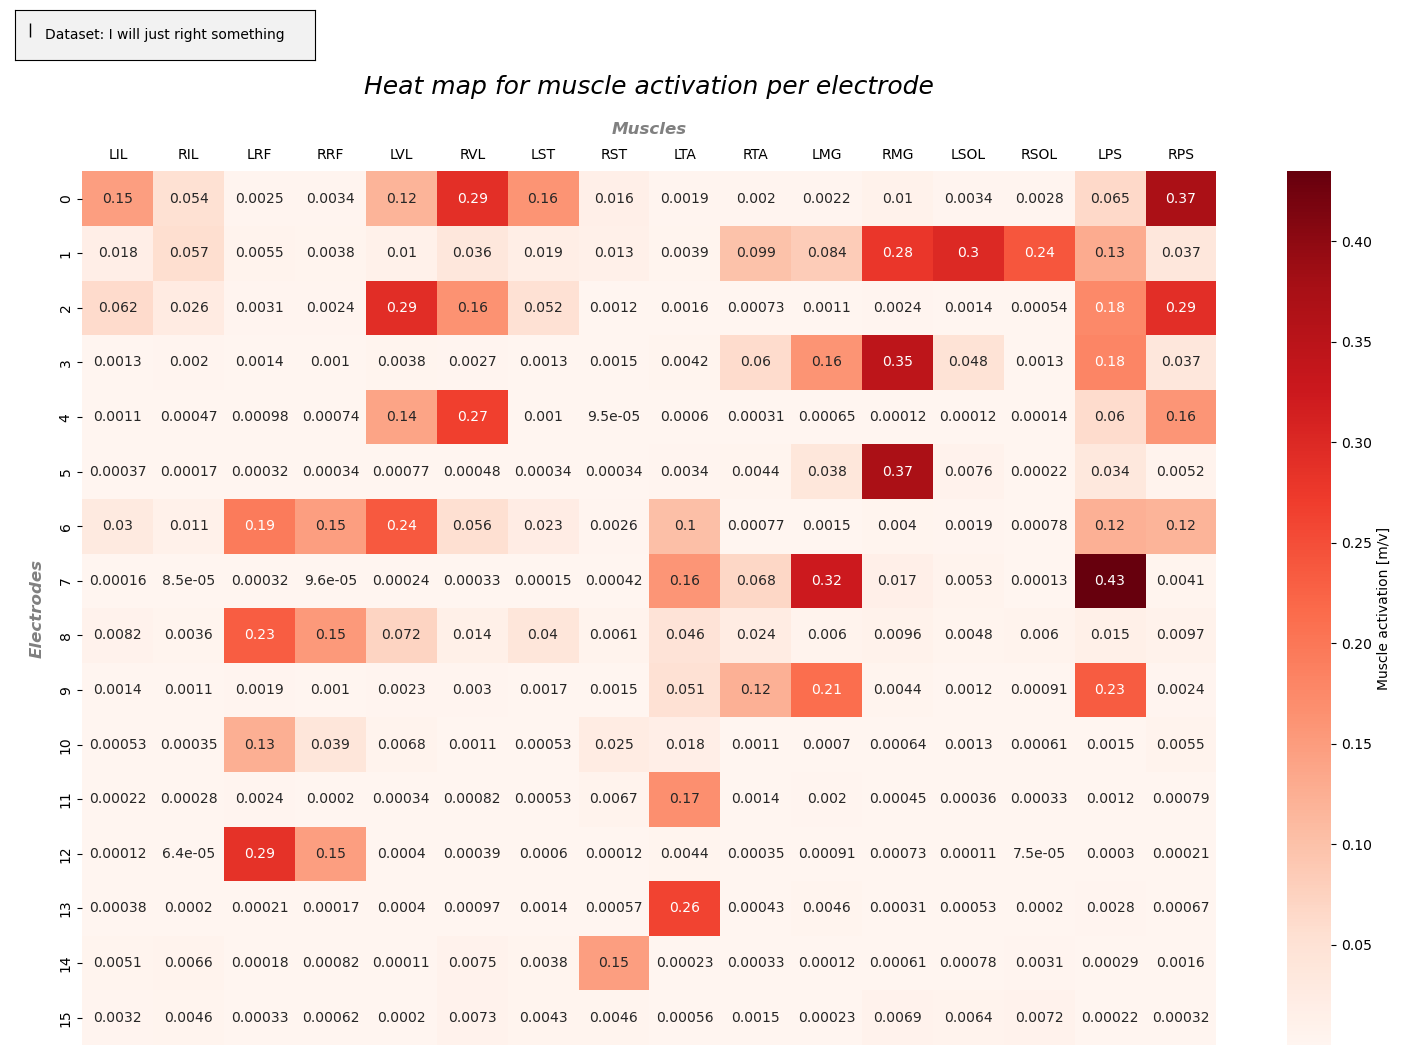

In [182]:
from matplotlib.widgets import TextBox

c_bar_label= f"Muscle activation [{unit}]"   
fig, ax = plt.subplots(figsize=(15,10))# creating subplot

sns.heatmap(data=data, cmap="Reds", cbar=True,
annot=True,  xticklabels=mt_muscles["muscle_name"],
yticklabels=mt_electrodes["elec_name"],
cbar_kws={'label': c_bar_label},
fmt='.2g' )
 # get the current axis;
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

ax.set_title('Heat map for muscle activation per electrode', size=18, fontstyle='italic', pad=20)
ax.set_xlabel('Muscles',  size=12, fontstyle='italic', labelpad=10, color="grey", fontweight="bold") 
ax.xaxis.set_label_position('top') 
ax.set_ylabel('Electrodes', size=12, fontstyle='italic', labelpad=10, color="grey", fontweight="bold")
# fig.colorbar(cm.ScalarMappable( cmap="Reds"), ax=ax, shrink=0.5)
# fig.set_facecolor("black")


axbox = fig.add_axes([0, 1.0, 0.2, 0.05]) #[left, bottom, width, height]
text_box = TextBox(axbox,label=None, textalignment="center")
text_box.set_val("Dataset: I will just right something")  # Trigger `submit` with the initial string.

plt.show()
    

Create heat map with peak to peak / amp data

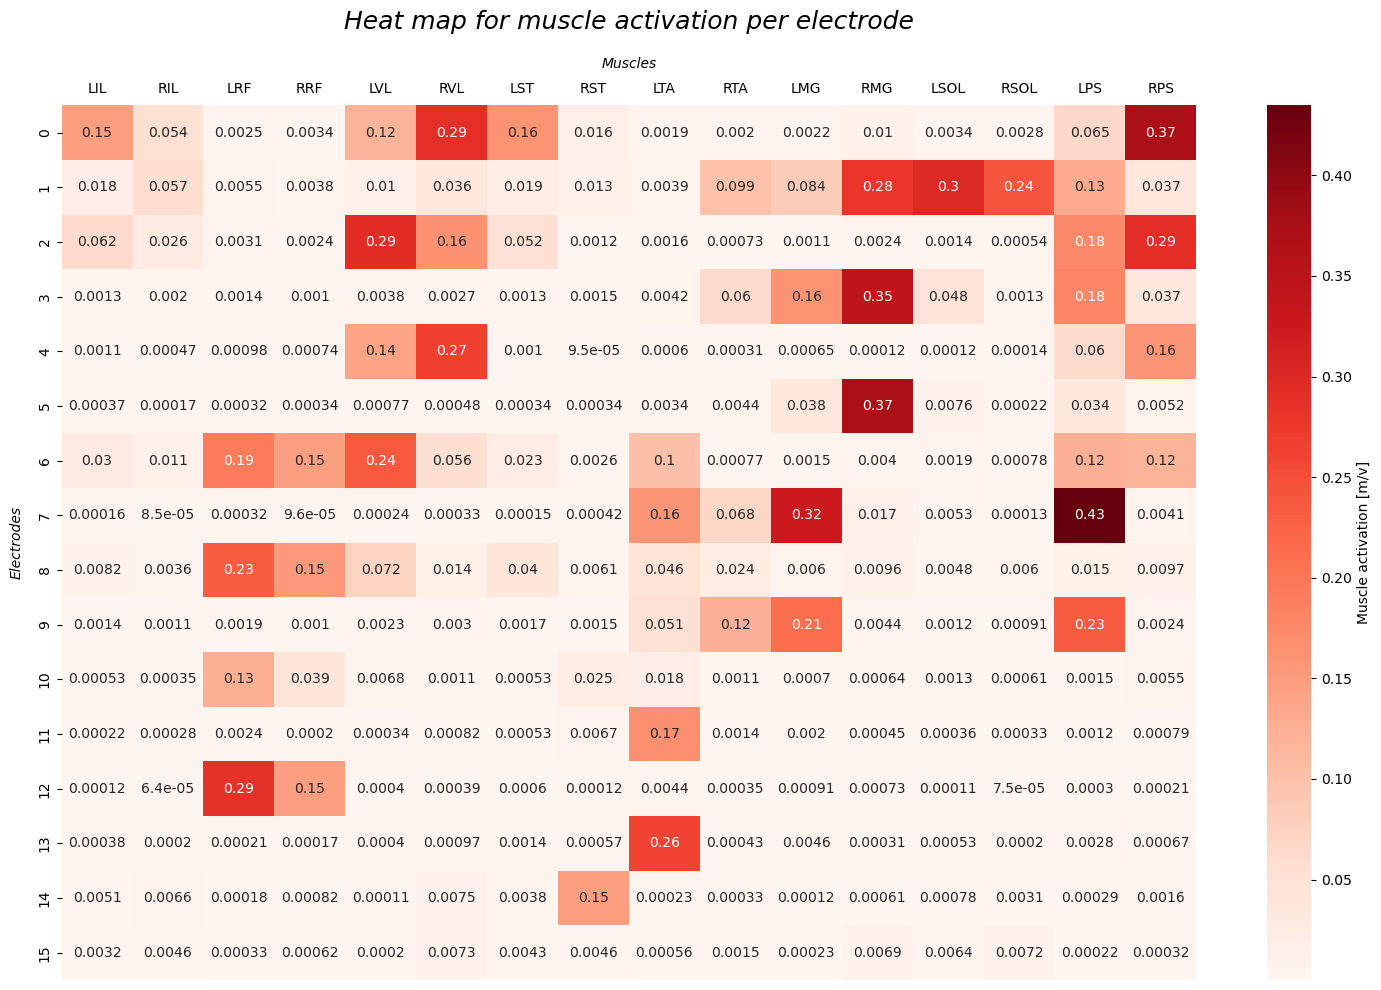

In [131]:
create_heatmap_all_muscles_overview(data=data, unit="m/v")

# From simulations get rootles for muscle i